# U.S. Medical Insurance Costs

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = pd.read_csv("insurance.csv") 

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.loc[:, 'age'].min()
#max age is 64
#min age is 16

18

In [8]:
data.groupby('sex')['charges'].agg(['mean', 'min', 'max'])

,mean,min,max
sex,,,
female,12569.578844,1607.5101,63770.42801
male,13956.751178,1121.8739,62592.87309


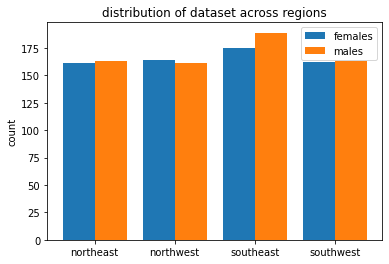

In [9]:
df1 = data.groupby('region')['sex'].value_counts().unstack().fillna(0)

xpos = np.arange(len(df1.index.tolist()))
plt.xticks(xpos, df1.index.tolist())
plt.ylabel("count")
plt.title("distribution of dataset across regions")
plt.bar(xpos-0.2, df1.loc[:,'female'].tolist(),width = 0.4,label = "females")
plt.bar(xpos+0.2, df1.loc[:, 'male'].tolist(),width = 0.4, label = "males")
plt.legend()

<BarContainer object of 47 artists>

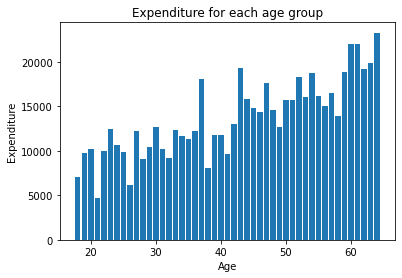

In [11]:
summation_on_age = data.groupby('age')['charges'].agg(['mean', 'min', 'max'])
plt.ylabel("Expenditure")
plt.xlabel("Age")
plt.title("Expenditure for each age group")
plt.bar(summation_on_age.index.tolist(), summation_on_age.loc[:,'mean'].tolist(), label = 'Expenditure for each age group')

In [12]:
females = data.loc[data.sex == 'female', :]
males = data.loc[data.sex == 'male', :]
females.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


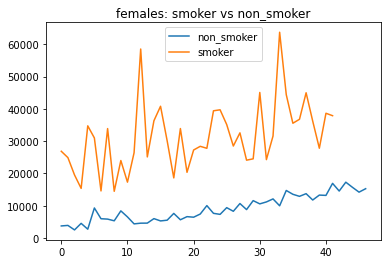

In [87]:
females_no_smoke = females.loc[females.smoker == 'no',['charges', 'age']]
females_smoke = females.loc[females.smoker == 'yes',['charges', 'age']]
females_no_smoke.head()
f_no_smoke = females_no_smoke.groupby('age')['charges'].agg(['mean'])
f_smoke = females_smoke.groupby('age')['charges'].agg(['mean'])
plt.plot(f_no_smoke.loc[:,'mean'].tolist(), label= 'non_smoker')
plt.plot(f_smoke.loc[:,'mean'].tolist(), label = 'smoker')
plt.title("females: smoker vs non_smoker")
plt.ylabel("Insurance Charge")
plt.xlabel("Age")
plt.legend()

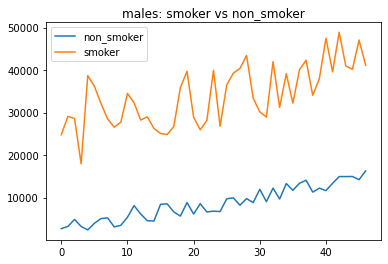

In [88]:
males_no_smoke = males.loc[males.smoker == 'no',['charges', 'age']]
males_smoke = males.loc[males.smoker == 'yes',['charges', 'age']]
males_no_smoke.head()
m_no_smoke = males_no_smoke.groupby('age')['charges'].agg(['mean'])
m_smoke = males_smoke.groupby('age')['charges'].agg(['mean'])
plt.plot(m_no_smoke.loc[:,'mean'].tolist(), label= 'non_smoker')
plt.plot(m_smoke.loc[:,'mean'].tolist(),label= 'smoker')
plt.title("males: smoker vs non_smoker")
plt.ylabel("Insurance Charge")
plt.xlabel("Age")
plt.legend()

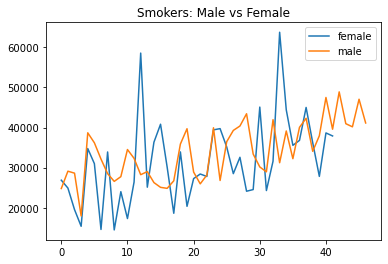

In [89]:
plt.plot(f_smoke.loc[:,'mean'].tolist(), label= 'female')
plt.plot(m_smoke.loc[:, 'mean'].tolist(), label = 'male')
plt.title("Smokers: Male vs Female")
plt.ylabel("Insurance Charge")
plt.xlabel("Age")
plt.legend()

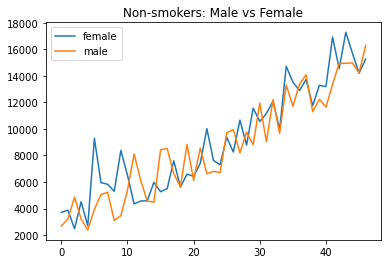

In [90]:
plt.plot(f_no_smoke.loc[:,'mean'].tolist(), label= 'female')
plt.plot(m_no_smoke.loc[:, 'mean'].tolist(), label= 'male')
plt.title("Non-smokers: Male vs Female")
plt.ylabel("Insurance Charge")
plt.xlabel("Age")
plt.legend()

In [92]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


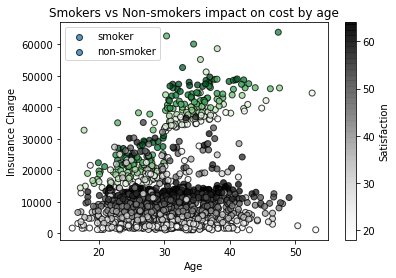

In [16]:
#separating the bmis on smoking and non smoking
bmi_list_smoker = data.loc[data.smoker == 'yes', 'bmi'].tolist()
bmi_list_nonsmoker = data.loc[data.smoker == 'no', 'bmi'].tolist()

#getting the age separation on smoking and non smoking to do the coour variation in the scatter plot
age_list_smoker = data.loc[data.smoker == 'yes', 'age'].tolist()
age_list_nonsmoker = data.loc[data.smoker == 'no', 'age'].tolist()

#dissecting teh y scale of insurance charges too as in a scatter plot we need to have equatl x and y
charges_list_smoker = data.loc[data.smoker == 'yes', 'charges'].tolist()
charges_list_nonsmoker = data.loc[data.smoker == 'no', 'charges'].tolist()

#plotting
plt.scatter(bmi_list_smoker, charges_list_smoker, c=age_list_smoker ,cmap='Greens', edgecolor = 'black', linewidth =1, alpha=0.75, label= 'smoker')
plt.scatter(bmi_list_nonsmoker, charges_list_nonsmoker, c=age_list_nonsmoker,cmap='Greys', edgecolor = 'black',linewidth =1, alpha=0.75, label= 'non-smoker')
cbar = plt.colorbar()
cbar.set_label('Satisfaction')
plt.title("Smokers vs Non-smokers impact on cost by age")
plt.ylabel("Insurance Charge")
plt.xlabel("Age")
plt.legend()

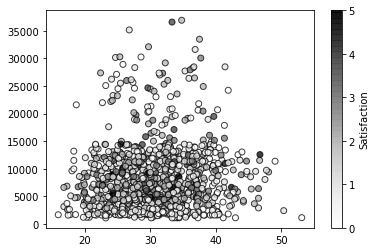

In [170]:
#separating the bmis on smoking and non smoking
bmi_list_smoker = data.loc[(data.smoker == 'yes'), 'bmi'].tolist()
bmi_list_nonsmoker = data.loc[(data.smoker == 'no'), 'bmi'].tolist()

#getting the age separation on smoking and non smoking to do the coour variation in the scatter plot
age_list_smoker = data.loc[(data.smoker == 'yes'), 'children'].tolist()
age_list_nonsmoker = data.loc[(data.smoker == 'no'), 'children'].tolist()

#dissecting the y scale of insurance charges too as in a scatter plot we need to have equal x and y
charges_list_smoker = data.loc[(data.smoker == 'yes'), 'charges'].tolist()
charges_list_nonsmoker = data.loc[(data.smoker == 'no') , 'charges'].tolist()

#plotting
#plt.scatter(bmi_list_smoker, charges_list_smoker, c=age_list_smoker ,cmap='Greens', edgecolor = 'black', linewidth =1, alpha=0.75)
plt.scatter(bmi_list_nonsmoker, charges_list_nonsmoker, c=age_list_nonsmoker,cmap='Greys', edgecolor = 'black',linewidth =1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('Satisfaction')
plt.title("Smokers vs Non-smokers impact on cost by age")
plt.ylabel("Insurance Charge")
plt.xlabel("Age")

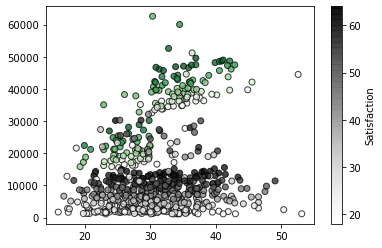

In [167]:
#separating the MALE bmis on smoking and non smoking
bmi_list_smoker = data.loc[(data.smoker == 'yes') & (data.sex =='male'), 'bmi'].tolist()
bmi_list_nonsmoker = data.loc[(data.smoker == 'no') & (data.sex =='male'), 'bmi'].tolist()

#getting the age separation on smoking and non smoking to do the coour variation in the scatter plot
age_list_smoker = data.loc[(data.smoker == 'yes') & (data.sex =='male'), 'age'].tolist()
age_list_nonsmoker = data.loc[(data.smoker == 'no') & (data.sex =='male'), 'age'].tolist()

#dissecting teh y scale of insurance charges too as in a scatter plot we need to have equatl x and y
charges_list_smoker = data.loc[(data.smoker == 'yes') & (data.sex =='male'), 'charges'].tolist()
charges_list_nonsmoker = data.loc[(data.smoker == 'no') & (data.sex =='male'), 'charges'].tolist()

#plotting
plt.scatter(bmi_list_smoker, charges_list_smoker, c=age_list_smoker ,cmap='Greens', edgecolor = 'black', linewidth =1, alpha=0.75)
plt.scatter(bmi_list_nonsmoker, charges_list_nonsmoker, c=age_list_nonsmoker,cmap='Greys', edgecolor = 'black',linewidth =1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('Satisfaction')
plt.title("Male Smokers vs Non-smokers impact on cost by age")
plt.ylabel("Insurance Charge")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

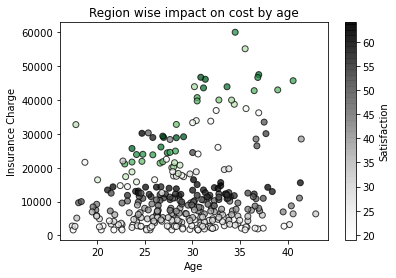

In [17]:
#separating the MALE bmis on smoking and non smoking
bmi_list_smoker = data.loc[(data.smoker == 'yes') & (data.region =='northwest'), 'bmi'].tolist()
bmi_list_nonsmoker = data.loc[(data.smoker == 'no') & (data.region =='northwest'), 'bmi'].tolist()

#getting the age separation on smoking and non smoking to do the coour variation in the scatter plot
age_list_smoker = data.loc[(data.smoker == 'yes') & (data.region =='northwest'), 'age'].tolist()
age_list_nonsmoker = data.loc[(data.smoker == 'no') & (data.region =='northwest'), 'age'].tolist()

#dissecting teh y scale of insurance charges too as in a scatter plot we need to have equatl x and y
charges_list_smoker = data.loc[(data.smoker == 'yes') & (data.region =='northwest'), 'charges'].tolist()
charges_list_nonsmoker = data.loc[(data.smoker == 'no') & (data.region =='northwest'), 'charges'].tolist()

#plotting
plt.scatter(bmi_list_smoker, charges_list_smoker, c=age_list_smoker ,cmap='Greens', edgecolor = 'black', linewidth =1, alpha=0.75)
plt.scatter(bmi_list_nonsmoker, charges_list_nonsmoker, c=age_list_nonsmoker,cmap='Greys', edgecolor = 'black',linewidth =1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('Satisfaction')
plt.title("Region wise impact on cost by age")
plt.ylabel("Insurance Charge")
plt.xlabel("Age")

In [21]:
print("Conclusion:\n1) The major factors influencing the insurance costs is the factor of smoking.\n2) Non impacting factors are region and gender")

Conclusion:
1) The major factors influencing the insurance costs is the factor of smoking.
2) Non impacting factors are region and gender
